In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

# Data visualizing

In [21]:
df = pd.read_csv('DemoData.csv')
df.drop(df.tail(26).index,inplace=True)
for idx in range(len(df.index)):
    df.iat[idx, 0] = datetime.strptime(df.iat[idx, 0], '%m/%d/%Y %H:%M')
df = df.sort_values(by=['date'])
df.tail(30)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
638,2022-04-02 00:00:00,36314,5027137.0,0.0,0.0,10.0,22490.0,0.0,0.0
241,2022-04-03 00:00:00,29909,5068362.0,0.0,0.0,9.0,22499.0,0.0,0.0
154,2022-04-04 00:00:00,26904,5095266.0,0.0,0.0,9.0,22508.0,0.0,0.0
135,2022-04-05 00:00:00,30954,5126220.0,0.0,0.0,10.0,22518.0,0.0,0.0
166,2022-04-06 00:00:00,27548,5163068.0,0.0,0.0,6.0,22524.0,0.0,0.0
695,2022-04-07 00:00:00,25777,5188845.0,0.0,0.0,6.0,22530.0,0.0,0.0
649,2022-04-08 00:00:00,22033,5236641.0,0.0,0.0,12.0,22542.0,0.0,0.0
303,2022-04-09 00:00:00,18913,5257099.0,0.0,0.0,3.0,22545.0,0.0,0.0
497,2022-04-10 00:00:00,16476,5273575.0,0.0,0.0,1.0,22546.0,0.0,0.0
314,2022-04-11 00:00:00,13790,5285515.0,0.0,0.0,2.0,22548.0,0.0,0.0


In [3]:
df.dtypes

date                  object
case_by_day            int64
case_by_time         float64
active_by_day        float64
active_by_time       float64
death_by_day         float64
death_by_time        float64
recovered_by_day     float64
recovered_by_time    float64
dtype: object

In [4]:
# Summary Stats
df.describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.00000,745.000000,745.000000
mean,5479.001342,5.136982e+05,289.953020,6690.426846,30.369128,6422.41745,8.875168,1639.928859
std,15521.184400,1.238343e+06,1653.040662,22495.101877,71.894650,8992.14423,37.300498,2406.029420
min,0.000000,3.600000e+01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,7.020000e+02,0.000000,0.000000,0.000000,31.00000,0.000000,29.000000
50%,14.000000,1.169000e+03,0.000000,26.000000,0.000000,31.00000,0.000000,657.000000
75%,3965.000000,4.454460e+05,4.000000,124.000000,30.000000,16750.00000,2.000000,1072.000000
max,93973.000000,5.477821e+06,38559.000000,128636.000000,666.000000,22579.00000,400.000000,6656.000000


<AxesSubplot:xlabel='date'>

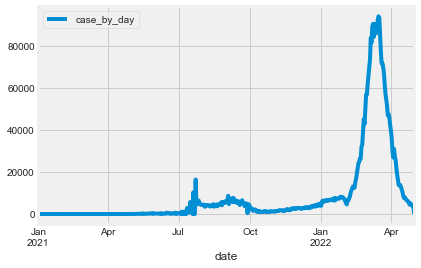

In [5]:
#df.plot(x ='date', y='case_by_day', kind = 'line')
df_filtered = df[df['date'] >= datetime.strptime('1/1/2021 00:00', '%m/%d/%Y %H:%M')]
df_filtered.plot(x ='date', y='case_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

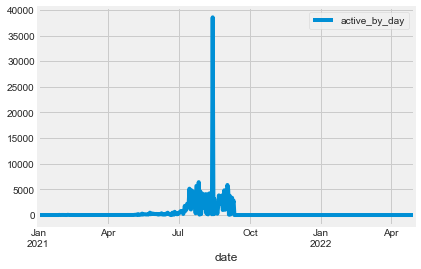

In [6]:
#df.plot(x ='date', y='case_by_day', kind = 'line')
df_filtered = df[df['date'] >= datetime.strptime('1/1/2021 00:00', '%m/%d/%Y %H:%M')]
df_filtered.plot(x ='date', y='active_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

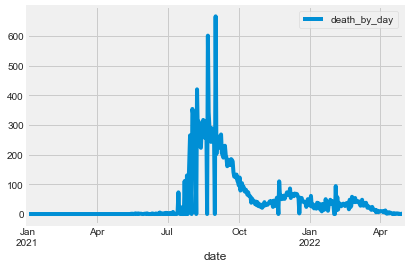

In [7]:
#df.plot(x ='date', y='case_by_day', kind = 'line')
df_filtered = df[df['date'] >= datetime.strptime('1/1/2021 00:00', '%m/%d/%Y %H:%M')]
df_filtered.plot(x ='date', y='death_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

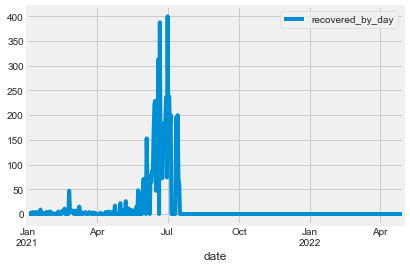

In [8]:
#df.plot(x ='date', y='case_by_day', kind = 'line')
df_filtered = df[df['date'] >= datetime.strptime('1/1/2021 00:00', '%m/%d/%Y %H:%M')]
df_filtered.plot(x ='date', y='recovered_by_day', kind = 'line')

# Predicting case by day

In [9]:
new_df = df_filtered.set_index('date')

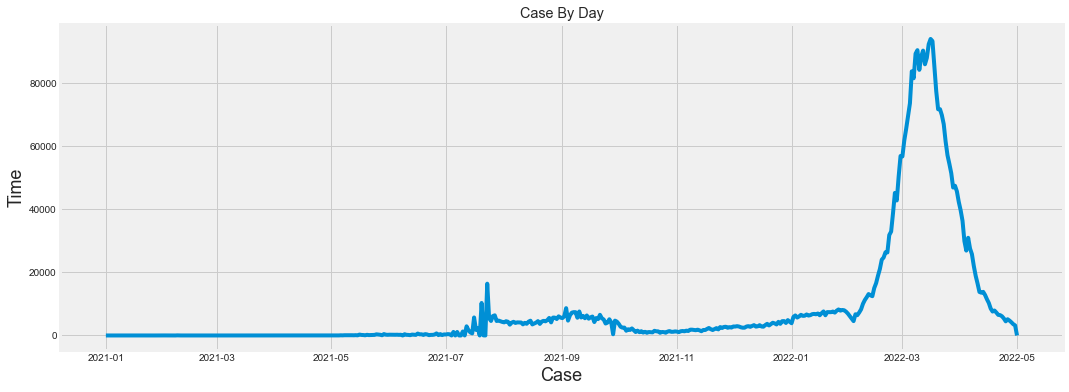

In [10]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

In [11]:
# Create a new dataframe with only the 'Close column 
data = new_df.filter(['case_by_day'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95 ))

training_data_len

462

In [12]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [2.12827089e-05],
       [5.32067722e-05],
       [2.12827089e-05],
       [3.19240633e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.12827089e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.06413544e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.25654177e-05],
       [5.32067722e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.12827089e-05],
       [1.06413544e-05],
       [4.25654177e-05],
       [0.00000000e+00],
       [1.06413544e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.06413544e-05],
       [2.12827089e-05],
       [0.00000000e+00],
       [8.51308355e-05],
       [2.12827089e-04],
       [1.06413544e-04],
       [1.38337608e-04],
       [1.38337608e-04],
       [1.06413544e-04],
       [5.32067722e-05],
       [3.19240633e-05],
       [4.25654177e-05],
       [3.19240633e-05],
       [0.00000000e+00],
       [3.72447405e-04],
       [9.57721899e-05],


In [13]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

DATA_LEN = 60
for i in range(DATA_LEN, len(train_data)):
    x_train.append(train_data[i - DATA_LEN: i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
x_train, y_train

(array([[[0.00000000e+00],
         [2.12827089e-05],
         [5.32067722e-05],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],
 
        [[2.12827089e-05],
         [5.32067722e-05],
         [2.12827089e-05],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],
 
        [[5.32067722e-05],
         [2.12827089e-05],
         [3.19240633e-05],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],
 
        ...,
 
        [[7.14779777e-02],
         [6.84664744e-02],
         [7.75009843e-02],
         ...,
         [3.86430145e-01],
         [3.18272270e-01],
         [2.86295000e-01]],
 
        [[6.84664744e-02],
         [7.75009843e-02],
         [8.81316974e-02],
         ...,
         [3.18272270e-01],
         [2.86295000e-01],
         [3.29392485e-01]],
 
        [[7.75009843e-02],
         [8.81316974e-02],
         [1.06839198e-01],
         

In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model

# Build the LSTM model
model = Sequential() # Input 60 -> 1
model.add(LSTM(30, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=8, epochs=50)

Epoch 1/50
51/51 [==============================] - 8s 55ms/step - loss: 0.0178
Epoch 2/50
51/51 [==============================] - 3s 51ms/step - loss: 0.0054
Epoch 3/50
51/51 [==============================] - 3s 57ms/step - loss: 0.0015
Epoch 4/50
51/51 [==============================] - 3s 62ms/step - loss: 6.3400e-04
Epoch 5/50
51/51 [==============================] - 4s 77ms/step - loss: 6.2774e-04
Epoch 6/50
51/51 [==============================] - 3s 56ms/step - loss: 7.4963e-04
Epoch 7/50
51/51 [==============================] - 3s 57ms/step - loss: 5.6984e-04
Epoch 8/50
51/51 [==============================] - 4s 74ms/step - loss: 5.7683e-04
Epoch 9/50
51/51 [==============================] - 4s 79ms/step - loss: 5.1048e-04
Epoch 10/50
51/51 [==============================] - 4s 82ms/step - loss: 6.1457e-04
Epoch 11/50
51/51 [==============================] - 3s 68ms/step - loss: 6.0696e-04
Epoch 12/50
51/51 [==============================] - 3s 51ms/step - loss: 7.3787e-04
E

In [15]:
# Create the testing data set
test_data = scaled_data[training_data_len - DATA_LEN: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(DATA_LEN, len(test_data)):
    x_test.append(test_data[i - DATA_LEN: i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2398.144373744804

In [16]:
X_test, Y_test = np.array(x_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
val_loss = model.evaluate(X_test, Y_test, batch_size=8)

3/3 [==============================] - 1s 30ms/step - loss: 107778088.0000


C:\Users\Asus\AppData\Local\Temp\ipykernel_8504\2657392128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


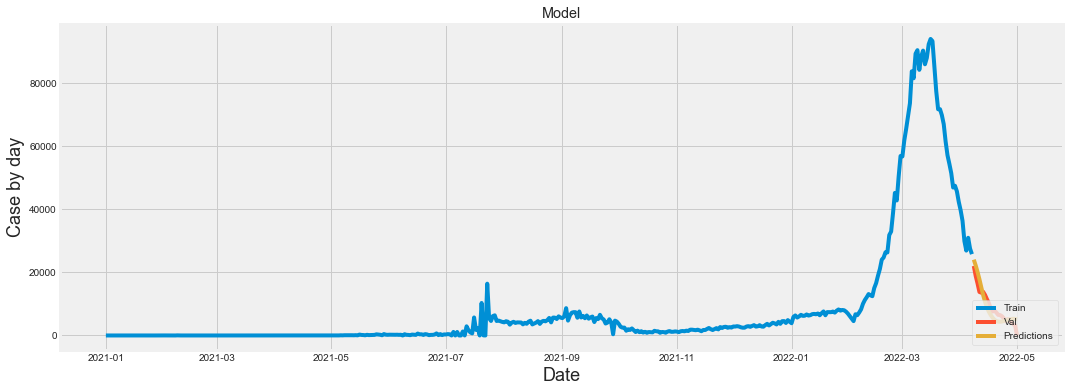

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train['case_by_day'])
plt.plot(valid[['case_by_day', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
# Show the valid and predicted prices
valid

,case_by_day,Predictions
date,,
2022-04-08,22033,24029.316406
2022-04-09,18913,22208.105469
2022-04-10,16476,20123.714844
2022-04-11,13790,17799.191406
2022-04-12,13560,15237.732422
2022-04-13,13818,12758.610352
2022-04-14,12824,10633.997070
2022-04-15,11473,8902.819336
2022-04-16,10291,7535.379883


In [19]:
model_save_path = 'hanoi_covid_predict.hdf5'
model.save(model_save_path, include_optimizer=False)